In [124]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [125]:
df = pd.read_excel('nacional_por_anyos.xlsx')

In [126]:
df

,GRUPO DELICTUAL / DELITO,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Delitos de mayor connotación social,500579,505322,551803,569782,616372,597987,654828,597629,597033,61403,595877,562218,559715,549837,554829,386483,335017,488268
1,Homicidios,568,587,574,557,594,487,543,483,481,539,526,495,638,654,692,889,695,934
2,Hurtos,15527,153715,167896,175653,191103,186982,208131,191095,188283,19221,18407,172319,171167,172202,169114,96549,80979,118131
3,Lesiones leves,7606,79671,85778,93493,94478,92269,98935,8592,76772,6932,63987,60001,58543,59355,61944,46332,45154,57612
4,"Lesiones menos graves, graves o gravísimas",23265,20992,21728,23276,23816,22259,22963,19813,18228,17451,15966,15247,1462,15215,17013,15428,14427,17391
5,Otros robos con fuerza,13065,17029,874,7097,7429,8755,6628,5005,5783,6343,6069,5941,6961,6856,7388,5379,5712,8526
6,Robo con violencia o intimidación,54488,56504,65962,62003,61612,53219,61423,54092,57985,65626,67284,65707,69674,73788,78845,66241,47808,78568
7,Robo de objetos de o desde vehículo,3999,3508,4402,46071,55047,57248,63169,58703,61628,64035,6517,61586,60233,55179,54779,39081,3598,51441
8,Robo de vehículo motorizado,12108,13638,19284,21422,27864,30782,34741,33014,3122,32862,31949,29776,29597,24286,23176,20467,23675,3334
9,Robo en lugar habitado,68311,6506,69178,68957,74925,68855,7476,72011,70918,7083,67725,62346,61623,58477,54011,34481,29778,43379


In [127]:
GRUPOS_DELITOS=[
    'Delitos de mayor connotación social',
    'Infracción a ley de armas',
    'Incivilidades',
    'Abigeato',
    'Abusos sexuales y otros delitos sexuales',
    'Violencia intrafamiliar',
    'Receptación',
    'Robo frustrado',
]



DELITOS_CON_GRUPOS = {
        'Delitos de mayor connotación social': [
            'Homicidios',
            'Hurtos',
            'Lesiones leves',
            'Lesiones menos graves, graves o gravísimas',
            'Otros robos con fuerza',
            'Robo con violencia o intimidación',
            'Robo de objetos de o desde vehículo',
            'Robo de vehículo motorizado',
            'Robo en lugar habitado',
            'Robo en lugar no habitado',
            'Robo por sorpresa',
            'Violaciones',
        ],
        'Infracción a ley de armas': [
            'Abandono de armas',
            'Hallazgo de armas o explosivos',
            'Otros ley de armas',
            'Porte de armas',
            'Tenencia ilegal de armas o explosivos',
        ],
        'Incivilidades': [
            'Amenazas',
            'Comercio ambulante o clandestino',
            'Consumo alcohol vía pública',
            'Daños',
            'Desórdenes',
            'Ebriedad',
            'Otras incivilidades',
            'Riña pública',
            'Ruidos molestos',
        ],
        'Abigeato': [],
        'Abusos sexuales y otros delitos sexuales': [],
        'Violencia intrafamiliar': [
            'Violencia intrafamiliar a adulto mayor',
            'Violencia intrafamiliar a hombre',
            'Violencia intrafamiliar a mujer',
            'Violencia intrafamiliar a niño',
            'Violencia intrafamiliar no clasificado',
        ],
        'Receptación': [],
        'Robo frustrado': [],
    }

DELITOS = [
    'Homicidios',
    'Hurtos',
    'Lesiones leves',
    'Lesiones menos graves, graves o gravísimas',
    'Otros robos con fuerza',
    'Robo con violencia o intimidación',
    'Robo de objetos de o desde vehículo',
    'Robo de vehículo motorizado',
    'Robo en lugar habitado',
    'Robo en lugar no habitado',
    'Robo por sorpresa',
    'Violaciones',
    'Abandono de armas',
    'Hallazgo de armas o explosivos',
    'Otros ley de armas',
    'Porte de armas',
    'Tenencia ilegal de armas o explosivos',
    'Amenazas',
    'Comercio ambulante o clandestino',
    'Consumo alcohol vía pública',
    'Daños',
    'Desórdenes',
    'Ebriedad',
    'Otras incivilidades',
    'Riña pública',
    'Ruidos molestos',
    'Violencia intrafamiliar a adulto mayor',
    'Violencia intrafamiliar a hombre',
    'Violencia intrafamiliar a mujer',
    'Violencia intrafamiliar a niño',
    'Violencia intrafamiliar no clasificado',
    'Receptación',
    'Robo frustrado'
]


SUBCATEGORIAS =[
    'casospoliciales',
    'denuncias',
    'detenciones',
    'aprehendidos',
]

EXCEL_PATH = [
    'dataset/nacional/nacional_por_anyos.xlsx',     # 0
    'dataset/region/tarapaca_por_anyos.xlsx',       # 1
    'dataset/region/antofagasta_por_anyos.xlsx',    # 2
    'dataset/region/atacama_por_anyos.xlsx',        # 3
    'dataset/region/coquimbo_por_anyos.xlsx',       # 4
    'dataset/region/valparaiso_por_anyos.xlsx',     # 5
    'dataset/region/ohiggins_por_anyos.xlsx',       # 6
    'dataset/region/maule_por_anyos.xlsx',          # 7
    'dataset/region/biobio_por_anyos.xlsx',         # 8
    'dataset/region/araucania_por_anyos.xlsx',      # 9
    'dataset/region/lagos_por_anyo.xlsx',           # 10
    'dataset/region/aysen_por_anyos.xlsx',          # 11
    'dataset/region/magallanes_por_anyos.xlsx',     # 12
    'dataset/region/metropolitana_por_anyos.xlsx',  # 13
    'dataset/region/rios_por_anyos.xlsx',           # 14
    'dataset/region/arica_por_anyos.xlsx',          # 15
    'dataset/region/nyuble_por_anyos.xlsx',         # 16
    'dataset/nacional/sexo_edad_nacional.xlsx',     # 17
    'dataset/region/sexo_edad_tarapaca.xlsx',     # 18
    'dataset/region/sexo_edad_antofagasta.xlsx',  # 19
    'dataset/region/sexo_edad_atacama.xlsx',      # 20
    'dataset/region/sexo_edad_coquimbo.xlsx',     # 21
    'dataset/region/sexo_edad_valparaiso.xlsx',   # 22
    'dataset/region/sexo_edad_ohiggins.xlsx',     # 23
    'dataset/region/sexo_edad_maule.xlsx',        # 24
    'dataset/region/sexo_edad_biobio.xlsx',       # 25
    'dataset/region/sexo_edad_araucania.xlsx',    # 26
    'dataset/region/sexo_edad_lagos.xlsx',        # 27
    'dataset/region/sexo_edad_aysen.xlsx',        # 28
    'dataset/region/sexo_edad_magallanes.xlsx',   # 29
    'dataset/region/sexo_edad_metropolitana.xlsx',# 30
    'dataset/region/sexo_edad_rios.xlsx',         # 31
    'dataset/region/sexo_edad_arica.xlsx',        # 32
    'dataset/region/sexo_edad_nyuble.xlsx',       # 33

]

TERRITORIO = [
    'Chile',                            # 0
    'Región de Tarapacá',               # 1
    'Región de Antofagasta',            # 2
    'Región de Atacama',                # 3
    'Región de Coquimbo',               # 4
    'Región de Valparaíso',             # 5
    "Región de O'Higgins",              # 6
    'Región del Maule',                 # 7
    'Región del Biobío',                # 8
    'Región de La Araucanía',           # 9
    'Región de Los Lagos',              # 10
    'Región de Aysén',                  # 11
    'Región de Magallanes',             # 12
    'Región Metropolitana',             # 13
    'Región de Los Ríos',               # 14
    'Región de Arica y Parinacota',     # 15
    'Región de Ñuble',                  # 16
]


# print(DELITOS[GRUPOS_DELITOS[0]][0]) #output homicidios

OPCIONES_DELITOS = [
    {'label': 'Delitos de mayor connotación social','value': 'delitos de mayor connotación social'},
    {'label':'Infracción a ley de armas','value': 'infracción a ley de armas'},
    {'label':'Incivilidades','value': 'incivilidades'},
    {'label':'Abigeato','value': 'abigeato'},
    {'label':'Abusos sexuales y otros delitos sexuales','value': 'abusos sexuales y otros delitos sexuales'},
    {'label':'Violencia intrafamiliar','value': 'violencia intrafamiliar'},
    {'label':'Receptación','value': 'receptación'},
    {'label':'Robo frustrado','value': 'robo frustrado'},
    {'label': 'Homicidios', 'value': 'homicidios'},
    {'label': 'Hurtos', 'value': 'hurtos'},
    {'label': 'Lesiones leves', 'value': 'lesiones_leves'},
    {'label': 'Lesiones menos graves, graves o gravísimas', 'value': 'lesiones_graves'},
    {'label': 'Otros robos con fuerza', 'value': 'otros_robos_fuerza'},
    {'label': 'Robo con violencia o intimidación', 'value': 'robo_violencia'},
    {'label': 'Robo de objetos de o desde vehículo', 'value': 'robo_objetos_vehiculo'},
    {'label': 'Robo de vehículo motorizado', 'value': 'robo_vehiculo'},
    {'label': 'Robo en lugar habitado', 'value': 'robo_lugar_habitado'},
    {'label': 'Robo en lugar no habitado', 'value': 'robo_lugar_no_habitado'},
    {'label': 'Robo por sorpresa', 'value': 'robo_sorpresa'},
    {'label': 'Violaciones', 'value': 'violaciones'},
    {'label': 'Abandono de armas', 'value': 'abandono_armas'},
    {'label': 'Hallazgo de armas o explosivos', 'value': 'hallazgo_armas_explosivos'},
    {'label': 'Otros ley de armas', 'value': 'otros_ley_armas'},
    {'label': 'Porte de armas', 'value': 'porte_armas'},
    {'label': 'Tenencia ilegal de armas o explosivos', 'value': 'tenencia_ilegal_armas_explosivos'},
    {'label': 'Amenazas', 'value': 'amenazas'},
    {'label': 'Comercio ambulante o clandestino', 'value': 'comercio_ambulante_clandestino'},
    {'label': 'Consumo alcohol vía pública', 'value': 'consumo_alcohol_via_publica'},
    {'label': 'Daños', 'value': 'danios'},
    {'label': 'Desórdenes', 'value': 'desordenes'},
    {'label': 'Ebriedad', 'value': 'ebriedad'},
    {'label': 'Otras incivilidades', 'value': 'otras_incivilidades'},
    {'label': 'Riña pública', 'value': 'rina_publica'},
    {'label': 'Ruidos molestos', 'value': 'ruidos_molestos'},
    {'label': 'Violencia intrafamiliar a adulto mayor', 'value': 'violencia_intrafamiliar_adulto_mayor'},
    {'label': 'Violencia intrafamiliar a hombre', 'value': 'violencia_intrafamiliar_hombre'},
    {'label': 'Violencia intrafamiliar a mujer', 'value': 'violencia_intrafamiliar_mujer'},
    {'label': 'Violencia intrafamiliar a niño', 'value': 'violencia_intrafamiliar_nino'},
    {'label': 'Violencia intrafamiliar no clasificado', 'value': 'violencia_intrafamiliar_no_clasificado'},
    {'label': 'Receptación', 'value': 'receptacion'},
    {'label': 'Robo frustrado', 'value': 'robo_frustrado'}
]

OPCIONES_TERRITORIO = [
    # {'label': 'Nacional', 'value': 'Nacional'},
    {'label': 'Tarapacá', 'value': '2'},
    {'label': 'Atacama', 'value': '3'},
    {'label': 'Coquimbo', 'value': '4'},
    {'label': 'Valparaíso', 'value': '5'},
    {'label': "O'Higgins", 'value': "6"},
    {'label': 'Maule', 'value': '7'},
    {'label': 'Biobío', 'value': '8'},
    {'label': 'Araucanía', 'value': '9'},
    {'label': 'Lagos', 'value': '10'},
    {'label': 'Aysén', 'value': '11'},
    {'label': 'Magallanes', 'value': '12'},
    {'label': 'Metropolitana', 'value': '13'},
    {'label': 'Ríos', 'value': '14'},
    {'label': 'Arica y Parinacota', 'value': '15'},
    {'label': 'Ñuble', 'value': '16'},
]

<Axes: title={'center': 'Gráfico de Delitos de mayor connotación social'}>

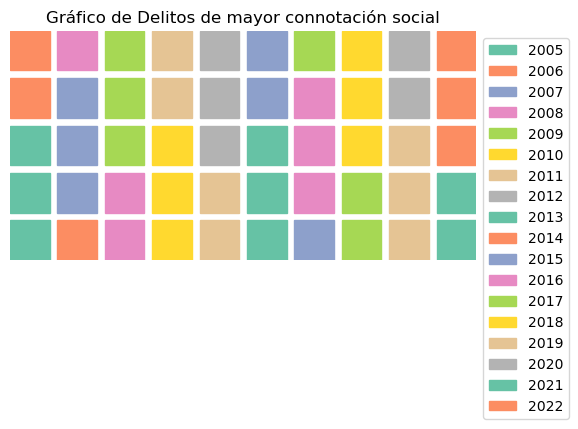

In [128]:

df.set_index('GRUPO DELICTUAL / DELITO', inplace=True)

# Crear el gráfico de waffles
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=df.loc['Delitos de mayor connotación social'].tolist(),
    labels=df.columns.tolist(),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(8, 4)
)
fig.gca().set_title("Gráfico de Delitos de mayor connotación social")
fig.gca()

In [129]:
columnas = df.columns
columnas

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


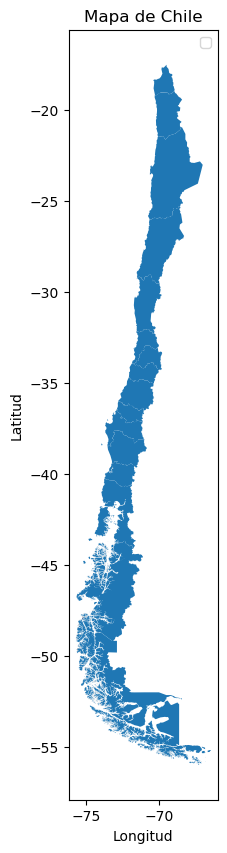

In [130]:
import geopandas as gpd

# Cargar los datos geoespaciales de Chile
chile = gpd.read_file('regiones_edit.geojson')

# Crear la figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar el gráfico de Chile
chile.plot(ax=ax)

# Personalizar el gráfico
ax.set_title('Mapa de Chile')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend()

# Mostrar el gráfico
plt.show()